# Train VAE

In [1]:
%load_ext autoreload
%autoreload 2

import os
import ast
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings(action='once')

from functions import vae

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/_bootstrap_external.py:445: ImportWarning: Not importing directory /home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/_bootstrap_external.py:445: ImportWarning: Not importing directory /home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is depre

In [2]:
# Create list of base directories

base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

base_dirs = [os.path.join(base_dir, "data"),
             os.path.join(base_dir, "models"),
             os.path.join(base_dir, "output"),
             os.path.join(base_dir, "data", "encoded"),
             os.path.join(base_dir, "output", "stats"),
             os.path.join(base_dir, "output", "viz")
             ]

# Check if analysis directory exist otherwise create

for each_dir in base_dirs:

    if os.path.exists(each_dir):
        print('directory already exists: {}'.format(each_dir))
    else:
        print('creating new directory: {}'.format(each_dir))
    os.makedirs(each_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz


In [3]:
# Load config params
config_file = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(),"../..")),
    "data",
    "metadata",
    "config_exp_0.txt")

d = {}
float_params = ["learning_rate", "kappa", "epsilon_std"]
str_params = ["analysis_name", "NN_architecture"]
lst_params = ["num_batches"]
with open(config_file) as f:
    for line in f:
        (name, val) = line.split()
        if name in float_params:
            d[name] = float(val)
        elif name in str_params:
            d[name] = str(val)
        elif name in lst_params:
            d[name] = ast.literal_eval(val)
        else:
            d[name] = int(val)

In [4]:
# Load arguments
normalized_data_file = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(),"../..")),
    "data",
    "input",
    "train_set_normalized.pcl")

In [5]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

print(normalized_data.shape)

(950, 5549)


In [6]:
# Parameters 
learning_rate = d['learning_rate']
batch_size = d['batch_size']
epochs = d['epochs']
kappa = d['kappa']
intermediate_dim = d['intermediate_dim']
latent_dim = d['latent_dim']
epsilon_std = d['epsilon_std']
num_PCs = latent_dim
train_architecture = "NN_{}_{}".format(intermediate_dim, latent_dim)

In [7]:
# Create output directories

output_dirs = [os.path.join(base_dir, "data", "encoded"),
             os.path.join(base_dir, "models"),
             os.path.join(base_dir, "output", "stats"),
             os.path.join(base_dir, "output", "viz")
             ]

# Check if analysis directory exist otherwise create

for each_dir in output_dirs:
    new_dir = os.path.join(each_dir, train_architecture)
    
    if os.path.exists(new_dir):
        print('directory already exists: {}'.format(new_dir))
    else:
        print('creating new directory: {}'.format(new_dir))
    os.makedirs(new_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded/NN_300_2
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models/NN_300_2
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats/NN_300_2
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz/NN_300_2


/home/alexandra/Documents/Repos/Batch_effects_simulation/scripts/experiment_0_generate_simulated_data/functions/vae.py:240: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 855 samples, validate on 95 samples
Epoch 1/100
855/855 [==============================] - 2s 2ms/step - loss: 3792.7709 - val_loss: 3641.3420
Epoch 2/100
855/855 [==============================] - 1s 1ms/step - loss: 3669.0465 - val_loss: 3592.2803
Epoch 3/100
855/855 [==============================] - 1s 1ms/step - loss: 3592.5808 - val_loss: 3724.1111
Epoch 4/100
855/855 [==============================] - 1s 1ms/step - loss: 3567.8729 - val_loss: 3625.0164
Epoch 5/100
855/855 [==============================] - 1s 1ms/step - loss: 3554.6688 - val_loss: 3672.6675
Epoch 6/100
855/855 [==============================] - 1s 1ms/step - loss: 3542.0646 - val_loss: 3590.9260
Epoch 7/100
855/855 [==============================] - 1s 1ms/step - loss: 3537.9198 - val_loss: 3589.1372
Epoch 8/100
855/855 [==============================] - 1s 1ms/step - loss: 3532.6487 - val_loss: 3553.8115
Epoch 9/100
855/855 [==============================] - 1s 1ms/step - loss: 3533.0446 - val_loss: 35

855/855 [==============================] - 1s 970us/step - loss: 3492.6951 - val_loss: 3471.2532
Epoch 77/100
855/855 [==============================] - 1s 963us/step - loss: 3492.1766 - val_loss: 3489.3157
Epoch 78/100
855/855 [==============================] - 1s 962us/step - loss: 3491.7488 - val_loss: 3483.4573
Epoch 79/100
855/855 [==============================] - 1s 999us/step - loss: 3492.4499 - val_loss: 3488.6504
Epoch 80/100
855/855 [==============================] - 1s 993us/step - loss: 3494.6678 - val_loss: 3472.4478
Epoch 81/100
855/855 [==============================] - 1s 965us/step - loss: 3493.3156 - val_loss: 3497.0293
Epoch 82/100
855/855 [==============================] - 1s 965us/step - loss: 3493.0760 - val_loss: 3484.4353
Epoch 83/100
855/855 [==============================] - 1s 978us/step - loss: 3491.7756 - val_loss: 3481.1531
Epoch 84/100
855/855 [==============================] - 1s 994us/step - loss: 3489.5648 - val_loss: 3485.6499
Epoch 85/100
855/855 [=

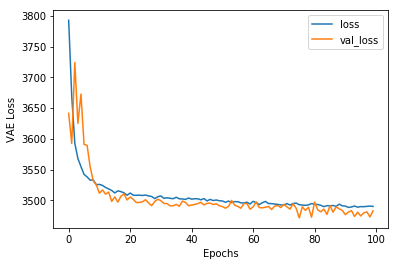

In [8]:
# Train nonlinear (VAE)
vae.tybalt_2layer_model(learning_rate,
                        batch_size,
                        epochs, 
                        kappa, 
                        intermediate_dim,
                        latent_dim, 
                        epsilon_std, 
                        base_dir, 
                        train_architecture 
                        )